Importing libraries

In [1]:
# Warning : the backend below may generate some issues if used
# in a conda environment.
#%matplotlib tk
# Try this backend if %matplotlib tk does not work properly
# In this case do not use the ginput command.
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

Enter dimensions of soccer field

In [2]:
goal_width=7.32
goal_height=2.44
goal_area_1=5.5
goal_area_2=18.32
penalty_area_1=16.5
penalty_area_2=40.32
corner_arc=1
flag_height=1.5
field_1=65
field_2=105

Enter 3D point coordinates - Goal-> Goal area -> Penalty area -> Corners -> Corner radius points -> Flag extremity

In [3]:
#u_field=np.array([#*****#,#*****#,     # Goal
                  #*****#,#*****#,     # Goal
                  #*****#,#*****#,     # Goal area
                  #*****#,#*****#,     # Goal area
                  #*****#,#*****#,     # Penalty area
                  #*****#,#*****#,     # Penalty area
                  #*****#,#*****#,     # Corners
                  #*****#,#*****#,     # Corner radius x
                  #*****#,#*****#,     # Corner radius y
                  #*****#,#*****#])    # Flag extremities

Keep points that are visible in the image buffer
and put them in homogeneous coordinates 

In [4]:
u_w=    np.array([[goal_width/2,0,0],[goal_width/2,goal_height,0], # Goal
                  [-goal_width/2,goal_height,0],[goal_width/2,0,0],# Goal
                  [goal_area_2/2,0,0],[goal_area_2/2,0,goal_area_1],# Goal area
                  [-goal_area_2/2,0,goal_area_1],[-goal_area_2/2,0,0],      # Goal area
                  [-penalty_area_2/2,0,0],  # Penalty area
                  [-field_1/2,0,0],              # Corner
                  [-field_1/2+corner_arc,0,0],  # Corner radius x
                  [-field_1/2,0,corner_arc],              # Corner radius z
                  [-field_1/2,flag_height,0]])             # Flag extremities


N=np.shape(u_w)[0]       # Number of visible points                                    
u_w=np.vstack((u_w.T,np.ones(N)))# Transformation to homogeneous coordinates
print(u_w)
print(np.shape(u_w))

[[  3.66   3.66  -3.66   3.66   9.16   9.16  -9.16  -9.16 -20.16 -32.5
  -31.5  -32.5  -32.5 ]
 [  0.     2.44   2.44   0.     0.     0.     0.     0.     0.     0.
    0.     0.     1.5 ]
 [  0.     0.     0.     0.     0.     5.5    5.5    0.     0.     0.
    0.     1.     0.  ]
 [  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.  ]]
(4, 13)


Show 3D cloud of points

<IPython.core.display.Javascript object>


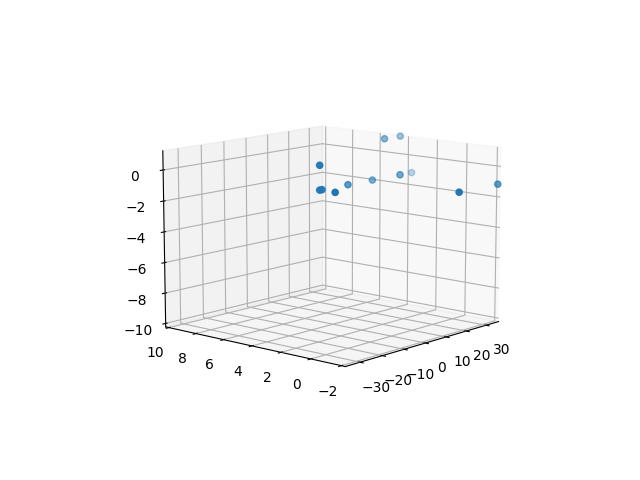

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u_w[0,:],-u_w[2,:],u_w[1,:])
ax.set_xlim(-35,35)
ax.set_zlim(-10,1)
ax.set_ylim(-2,10)
plt.show()

Get image buffer points manually

<IPython.core.display.Javascript object>


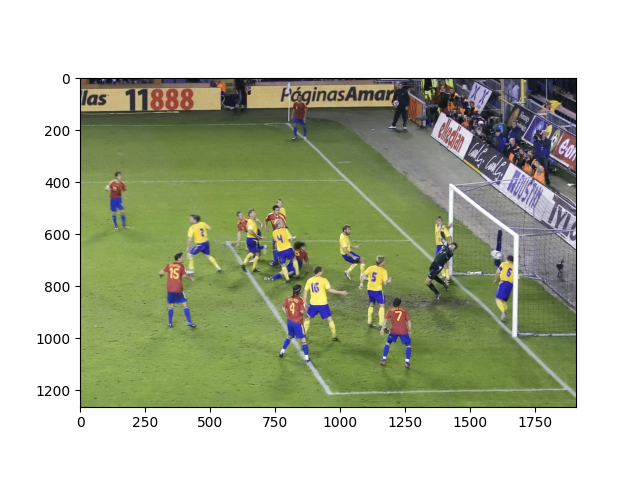

In [7]:
img=mpimg.imread('goal.jpg')
fig,ax = plt.subplots()
ax.imshow(img)

# If %matplotlib works properly you can
# use the following two lines
# Image buffer points from mouse clicks
#u_im = np.array(plt.ginput(N,timeout=-1))
#plt.close()

# If you %matplotlib does not work properly
# you can try the code below
u_im= np.array([]).reshape(0,2)
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    
    global u_im
    u_im = np.vstack((u_im,np.array([[ix,iy]])))

    if np.shape(u_im)[0] == 13:
        fig.canvas.mpl_disconnect(cid)
        plt.close()
        
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [9]:
print(u_im)

[]


Show image point coordinates in homogeneous coordinates

In [ ]:
u_im = np.vstack((np.transpose(u_im),np.ones(N)))
print(u_im)

Show chosen points

In [ ]:
plt.imshow(img)
plt.scatter(u_im[0,:],u_im[1,:])
plt.show()

Centering and scaling

3D points

In [ ]:
s_w = 1./np.std(u_w,1)[0:3]
t_w = -(np.mean(u_w,1)[0:3])
diag_s = np.diag(s_w)
T_w = np.hstack((diag_s,(s_w*t_w).reshape(-1,1)))
T_w = np.vstack((T_w,np.array([0,0,0,1])))
u_w_t = np.dot(T_w,u_w)
print(u_w_t)

Image buffer points

In [ ]:
#*****#

Transformed 3D points and buffer points

In [ ]:
u_w_t = #*****#   # Transformed 3D points
u_im_t= #*****# # Transformed image buffer points

Construction of the A matrix for DLT

In [ ]:
#*****#

Solution using the SVD

In [ ]:
#*****#

Reshape to get M_t

In [ ]:
#*****#

Transform to get M

In [ ]:
#*****#

Rescale to get three first elements of third row with unitary norm

In [ ]:
#*****#
print(M)

Getting Intrinsic and rotation matrices with RQ decomposition

In [ ]:
#*****#
print(M_int)
print(R)

Change signs of columns of M_int
and corresponding rows of R if necessary

In [ ]:
#*****#
print(M_int)
print(R)

Checking determinant of the rotation matrix

In [ ]:
#*****#

Project points on the image buffer using the estimated camera matrix

In [ ]:
u_sim=#*****#
u_sim=#*****#

plt.imshow(img)
plt.scatter(u_sim[0,:],u_sim[1,:])
plt.show()

Evaluate and print translation vector of the camera

In [ ]:
#*****#